<a href="https://colab.research.google.com/github/ValentinSilvestri/sig-fceia-clustering/blob/main/Clustering_SIG.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Clustering

Se trata de un problema de optimización, donde se trata de encontrar un conjunto de grupos (clusters) que optimicen una función objetivo, sujetos a una serie de restricciones.


## Problema de Optimización


### Función Objetivo
Este algoritmo divide un conjunto de $N$ de vectores $X$ en una serie de $K$ conjuntos $C$, cada uno de los cuales descrito con su media $μⱼ$, también llamada "centroide".

Para su resolución es necesario recurrir a métricas de vinculación, *linkage metrics*, siendo la más utilizada la siguiente:


<!-- Variability or Inertia -->
>$$
  variability(C_j) = \sum_{\substack{i=0 \\ x_i∈C_j}}^n(||x_i-\mu_j||^2) \text{ ; tambien llamada }inertia
$$

Para comparar clusters de distinto tamaño deberíamos normalizar la medida, dividiendo la variabilidad por el tamaño de cada cluster (obtenemos la varianza). Al normalizar la $variability$ la penalización de cada cluster será independiente de su tamaño; y dado que generalmente se desea penalizar a los clusters grandes y con alta diversidad más que a los clusters pequeños y con alta diversidad, esta medida no se suele normalizar.

La definición de $variability$ puede extenderse para un conjunto de clusters:
<!-- Dissimilarity -->
>$$
  dissimilarity(C) = \sum_{C_j∈C} variability(C_j)
$$

Luego, la función objetivo a optimizar sería la siguiente:
<!-- Función objetivo -->
>$$
  Funcion\text{ }Objetivo = \sum_{i=0}^n\min_{\mu_j∈C}(||x_i-\mu_j||^2)
$$
<!-- Centroide -->
>$$
  \mu_j = \text{media de los vectores que componen el cluster }C_j.
$$
<!-- Distancia Euclideana -->
>$$
  ||x_i-\mu_j|| = \text{distancia Euclideana entre un vector }i\text{ y la media del cluster }C_j.
$$

#### Deficiencias

La medida *__inertia__* posee una serie de deficiencias:

*    En primer lugar asume que los clusters son convexo e isotropicos, lo cual no siempre se cumple. Debido a ello, arroja resultados pobres al aplicarlo en clusters *elongados* o irregulares.

A continuación se presentan ejemplos en los cuales el método de *__k-means__* arroja resultados inadecuados:

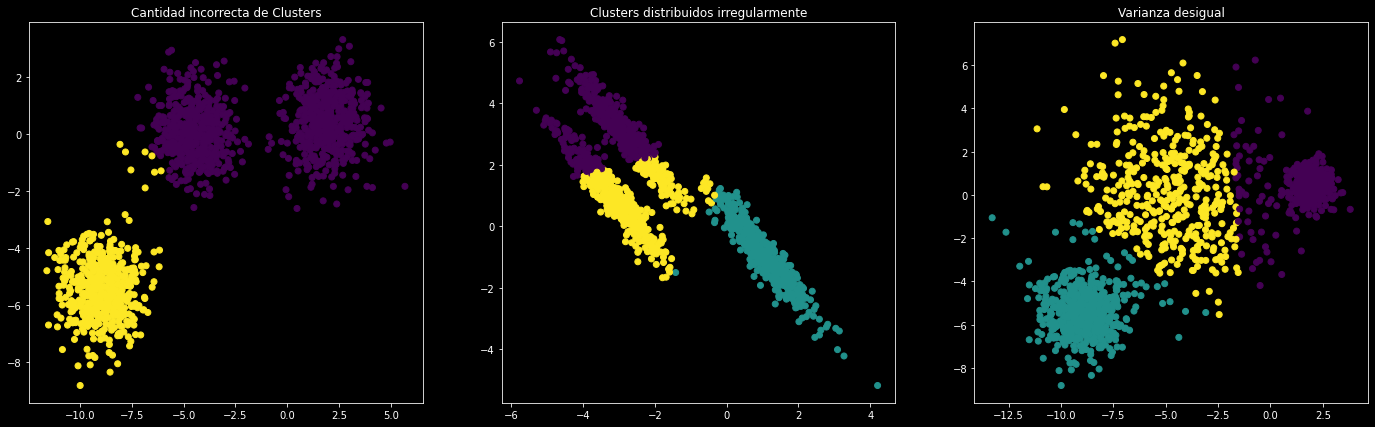

In [283]:
# Source: https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_assumptions.html#sphx-glr-auto-examples-cluster-plot-kmeans-assumptions-py

import numpy as np
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

plt.figure(figsize=(24, 7))

n_samples = 1500
random_state = 170
X, y = make_blobs(n_samples=n_samples, random_state=random_state)

# Incorrect number of clusters
y_pred = KMeans(n_clusters=2, random_state=random_state).fit_predict(X)

plt.subplot(131)
plt.scatter(X[:, 0], X[:, 1], c=y_pred)
plt.title("Cantidad incorrecta de Clusters")

# Anisotropically distributed data
transformation = [[0.60834549, -0.63667341], [-0.40887718, 0.85253229]]
X_aniso = np.dot(X, transformation)
y_pred = KMeans(n_clusters=3, random_state=random_state).fit_predict(X_aniso)

plt.subplot(132)
plt.scatter(X_aniso[:, 0], X_aniso[:, 1], c=y_pred)
plt.title("Clusters distribuidos irregularmente")

# Different variance
X_varied, y_varied = make_blobs(
    n_samples=n_samples, cluster_std=[1.0, 2.5, 0.5], random_state=random_state
)
y_pred = KMeans(n_clusters=3, random_state=random_state).fit_predict(X_varied)

plt.subplot(133)
plt.scatter(X_varied[:, 0], X_varied[:, 1], c=y_pred)
plt.title("Varianza desigual")

plt.show()

*   En [conjuntos de datos con muchas dimensiones](https://en.wikipedia.org/wiki/Clustering_high-dimensional_data), las distancias euclideanas suelen sufrir del [Efecto Hughes](https://en.wikipedia.org/wiki/Curse_of_dimensionality). Es por ello que en estos caso suelen aplicarse algoritmos de reducción de las dimensiones, tales como el [Análisis de Componentes Principales](https://scikit-learn.org/stable/modules/decomposition.html#pca), *PCA*, antes de aplicar el método de *k-means*. Beneficios de aplicar *PCA* junto a *k-means* puede disponible en [*K-means Clustering via Principal Component Analysis*](https://ranger.uta.edu/~chqding/papers/KmeansPCA1.pdf).



### Restricciones
Una restricción posible, y generalmente la más utilizada, consiste en fijar la cantidad de clusters:
>$$
  \text{Amount of clusters} ≤ k
$$

*Si no se estableciese una cantidad máxima de clusters, la función objetivo sería mínima cuando la cantidad de clusters __K__ sea igual a la cantidad de vectores __N__.*

### Definición formal
__Definición (*k-means*).__ Dados $n$ vectores $x_1,...,x_n∈ℜ^d$, y un entero $k$, encontrar $k$ puntos $\mu_1,...,\mu_k∈ℜ^d$ que minimicen la expresión:
>$$
  f_{k-means}= \sum_{i∈[n]}\min_{j∈[k]}(||x_i-\mu_j||^2)
$$

## Métodos de Resolución
Existe una amplia variedad de métodos para resolver los problemas de optimización de clustering, el más utilizado de ellos es el <i>[K-means](https://en.wikipedia.org/wiki/K-means_clustering)</i>, aunque puede no ser el más apropiado en ciertas ocasiones. Otros métodos ampliamente utilizados son la <i>[Clasificación Jerárquica](https://en.wikipedia.org/wiki/Hierarchical_clustering)</i> y el <i>[Algoritmo de Esperanza-Maximización](https://en.wikipedia.org/wiki/Expectation%E2%80%93maximization_algorithm)</i>.

En scikit-learn, la libería de Python que utilizaremos, contiene implementados 11 métodos dentro del módulo de <i>[Clustering](https://scikit-learn.org/stable/modules/clustering.html#)</i>.

### Algoritmo de Lloyd
Los problemas de Clustering desafortunandamente tienen una complejidad <i>[NP-Hard](https://en.wikipedia.org/wiki/NP-hardness)</i>; sin embargo existen múltiples métodos, y en particular, para <i>K-means</i> múltiples algoritmos para resolverlo, siendo uno de las más utilizadas el <i>[algoritmo de Lloyd](https://en.wikipedia.org/wiki/Lloyd%27s_algorithm)</i>, debido principalmente a las siguientes razones:
*   Su función objetivo es simple.
*   Se trata de un algoritmo sencillo, eficiente y que suele arribar a la solución óptima. $^1$
*   Los resultados son descriptivos y facilmente interpretables.


El algoritmo de Lloyd consta de tres pasos, siendo el primero la selección de $k$ vectores dentro del set de datos. Una vez inicializado, el algoritmo consiste en iterar entre los siguientes dos pasos. El primero de estos loops asigna cada vector al centroide más cercano, mientras que el segundo loop crea nuevos centroides tomando el promedio de todos los vectores asignados al clúster en el primer loop.

Estos últimos dos pasos se iteran, calculando en cada iteración el impacto sobre la función objetivo de los nuevos clústers. El algoritmo se detendrá una vez que estas mejoras dejen de ser significativas.


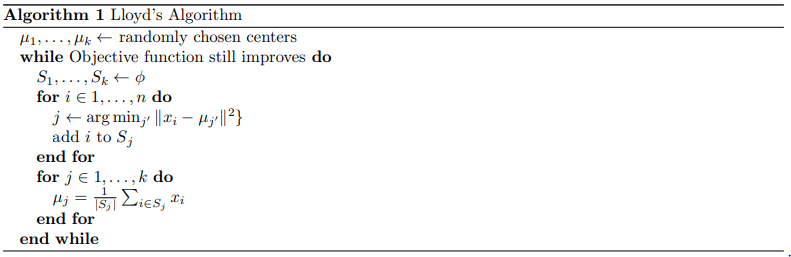

Con suficiente tiempo, el algoritmo de Lloyd converge a una solución; aunque la misma puede tratarse de un [mínimo local](https://es.wikipedia.org/wiki/Extremos_de_una_funci%C3%B3n#Extremos_relativos_o_locales). Esto esta fuertemente influenciado por la elección de los centroides iniciales, siendo una de sus principales debilidades.

Para sortear esta deficiencia, el algoritmo suele ejecutarse múltiples veces con distintos centroides iniciales. Una método desarrollado para hacer frente a esta deficiencia es el esquema de inicialización, o <i>seeding procedure</i>, $k-means++$.$^2$

Algoritmo $k-means++$ para seleccionar los centroides iniciales, <i>seeds</i>:

<!-- En este método, en cada iteración, se selecciona un centroide aleatoriamente dentro del set de datos, luego se escogen vectores dentro del conjunto de datos con una probabilidad proporcional a la mínima distancia cuadrática entre el punto seleccionado y el centroide. -->

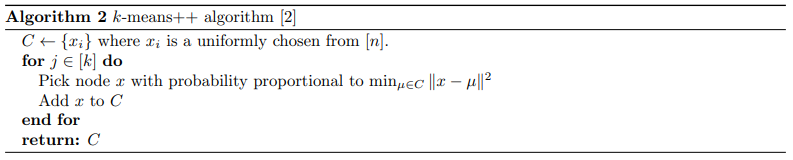

# Ejemplo 1
__Dataset utilizado:__ [Mall Customer Segmentation - Kaggle](https://www.kaggle.com/datasets/vjchoudhary7/customer-segmentation-tutorial-in-python).

Este sencillo dataset contiene mock data sobre el genero, edad, ingresos anuales y un puntaje en función del las compras realizadas.

In [284]:
# Importamos las librerías
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 
import plotly as py
import plotly.graph_objs as go
from google.colab import data_table
data_table.enable_dataframe_formatter()
plt.style.use('dark_background')

## Exploración de los datos

In [285]:
# Importamos el dataset y creamos un dataframe con el mismo
df = pd.read_csv('https://raw.githubusercontent.com/ValentinSilvestri/sig-fceia-clustering/main/utils/mall-customers-segmentation.csv')
df.rename(columns={"CustomerID": "Id Cliente", "Gender": "Género", "Age": "Edad", "Age": "Edad", "Annual Income (k$)": "Ingresos Anuales", "Spending Score (1-100)": "Puntaje"}, inplace=True)
df.replace({'Género': {'Male': 'Masculino', 'Female': 'Femenino'}}, inplace=True)
# Visualización de los datos
data_table.DataTable(df, include_index=False, num_rows_per_page=10)

,Id Cliente,Género,Edad,Ingresos Anuales,Puntaje
0,1,Masculino,19,15,39
1,2,Masculino,21,15,81
2,3,Femenino,20,16,6
3,4,Femenino,23,16,77
4,5,Femenino,31,17,40
...,...,...,...,...,...
195,196,Femenino,35,120,79
196,197,Femenino,45,126,28
197,198,Masculino,32,126,74
198,199,Masculino,32,137,18


In [286]:
df[['Género', 'Edad', 'Ingresos Anuales', 'Puntaje']].describe()

,Edad,Ingresos Anuales,Puntaje
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


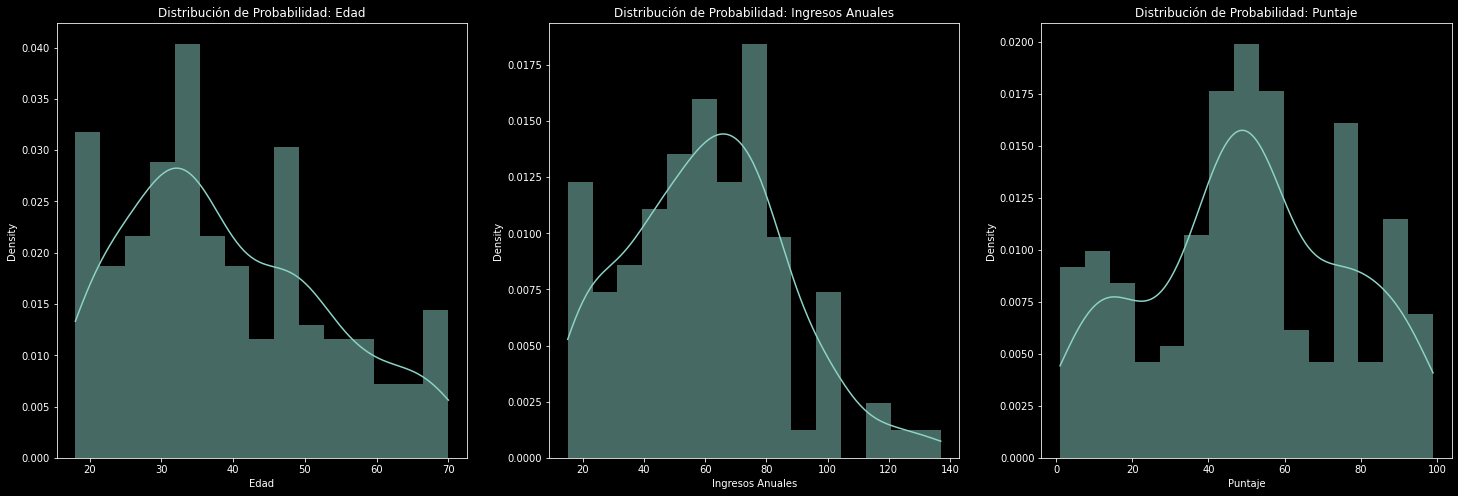

In [287]:
# Histogramas
plt.figure(1 , figsize = (25 , 8))
n = 0 
for field in ['Edad' , 'Ingresos Anuales' , 'Puntaje']:
  n += 1
  plt.subplot(1 , 3 , n)
  plt.subplots_adjust(hspace = 0.2 , wspace = 0.2)
  sns.histplot(df[field] , bins = 15, kde=True, stat="density", linewidth=0)
  plt.title(f'Distribución de Probabilidad: {field}')
plt.show()

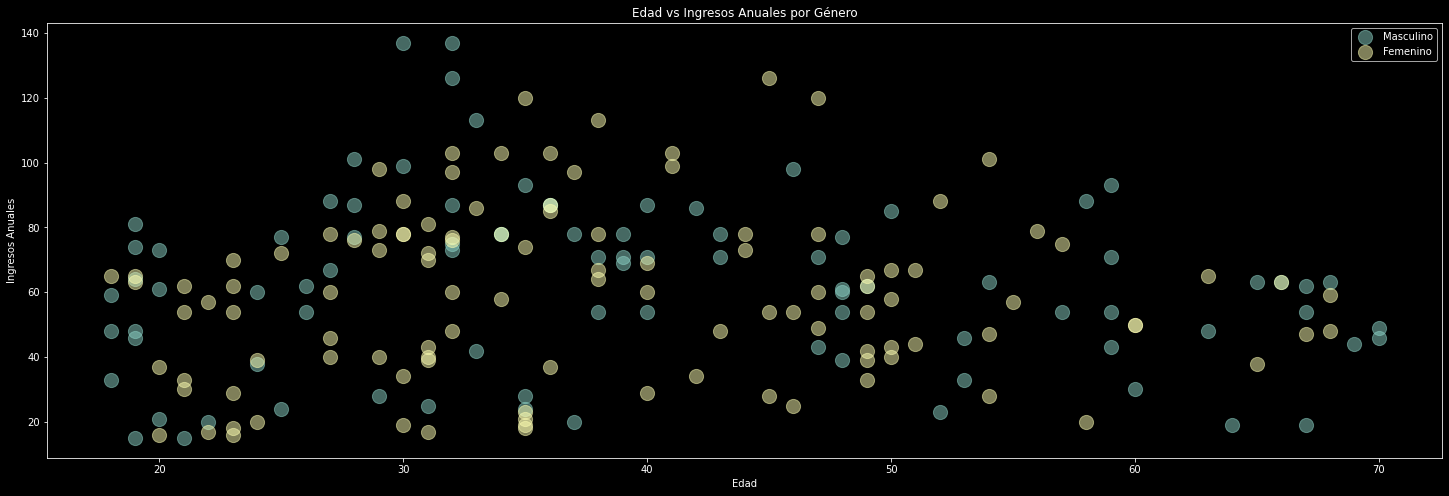

In [288]:
# Scatter plot Ingresos vs Edad por género
plt.figure(1 , figsize = (25 , 8))
for genero in ['Masculino', 'Femenino']:
  plt.scatter(x = 'Edad', y = 'Ingresos Anuales', data = df[df['Género'] == genero], s = 200, alpha = 0.5, label = genero)
plt.xlabel('Edad'), plt.ylabel('Ingresos Anuales') 
plt.title('Edad vs Ingresos Anuales por Género')
plt.legend()
plt.show()

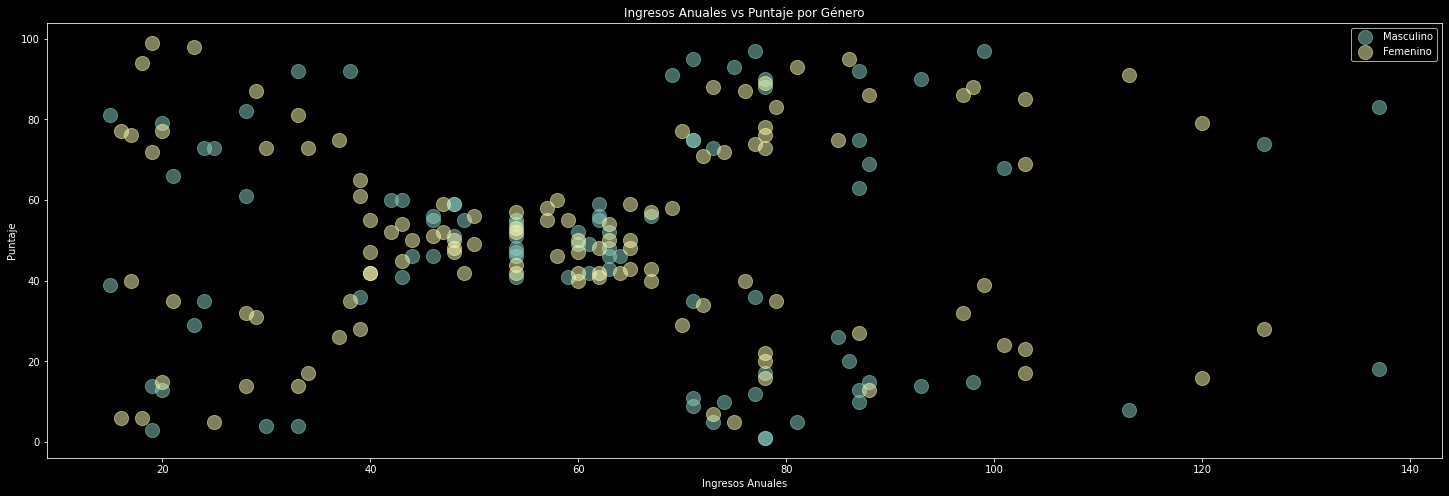

In [289]:
# Scatter plot Ingresos vs Puntaje por género
plt.figure(1 , figsize = (25 , 8))
for genero in ['Masculino' , 'Femenino']:
  plt.scatter(x = 'Ingresos Anuales', y = 'Puntaje', data = df[df['Género'] == genero], s = 200 , alpha = 0.5, label = genero)
plt.xlabel('Ingresos Anuales')
plt.ylabel('Puntaje')
plt.title('Ingresos Anuales vs Puntaje por Género')
plt.legend()
plt.show()

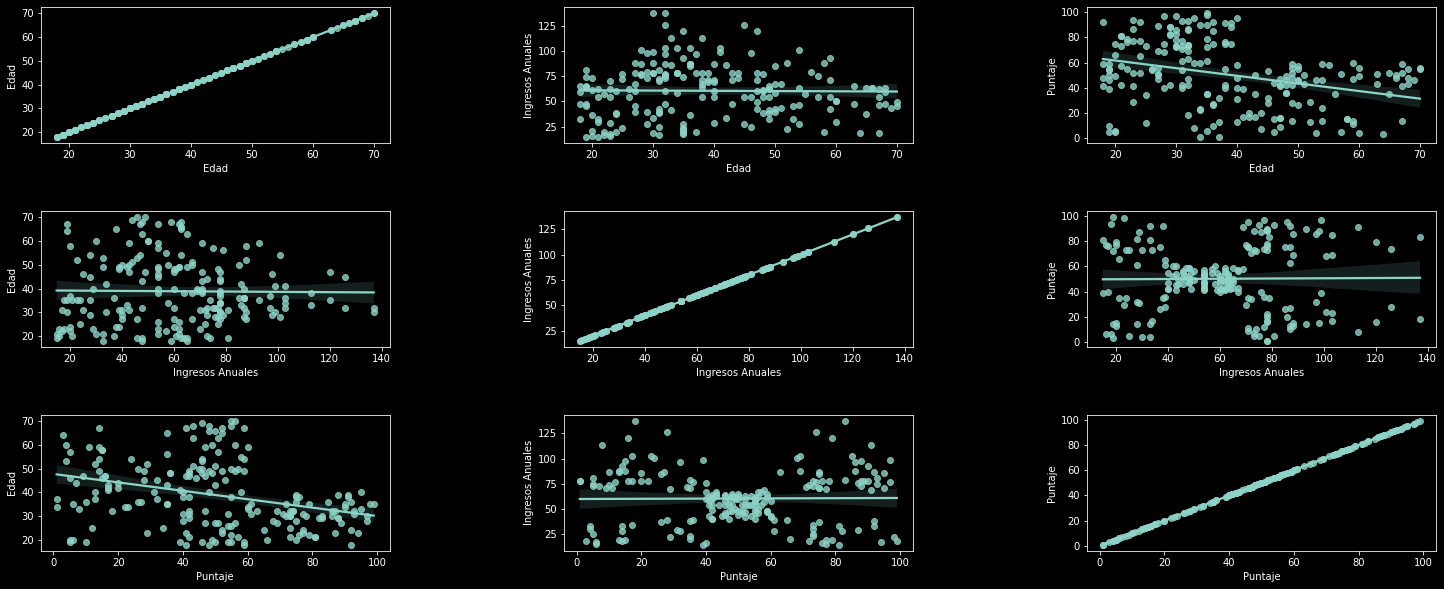

In [290]:
# Linear Regression plots
plt.figure(1 , figsize = (25 , 10))
n = 0 
fields = ['Edad' , 'Ingresos Anuales' , 'Puntaje']
for column in fields:
  for row in fields:
    n += 1
    plt.subplot(3 , 3 , n)
    plt.subplots_adjust(hspace = 0.5, wspace = 0.5)
    sns.regplot(x = column, y = row, data = df)
plt.show()

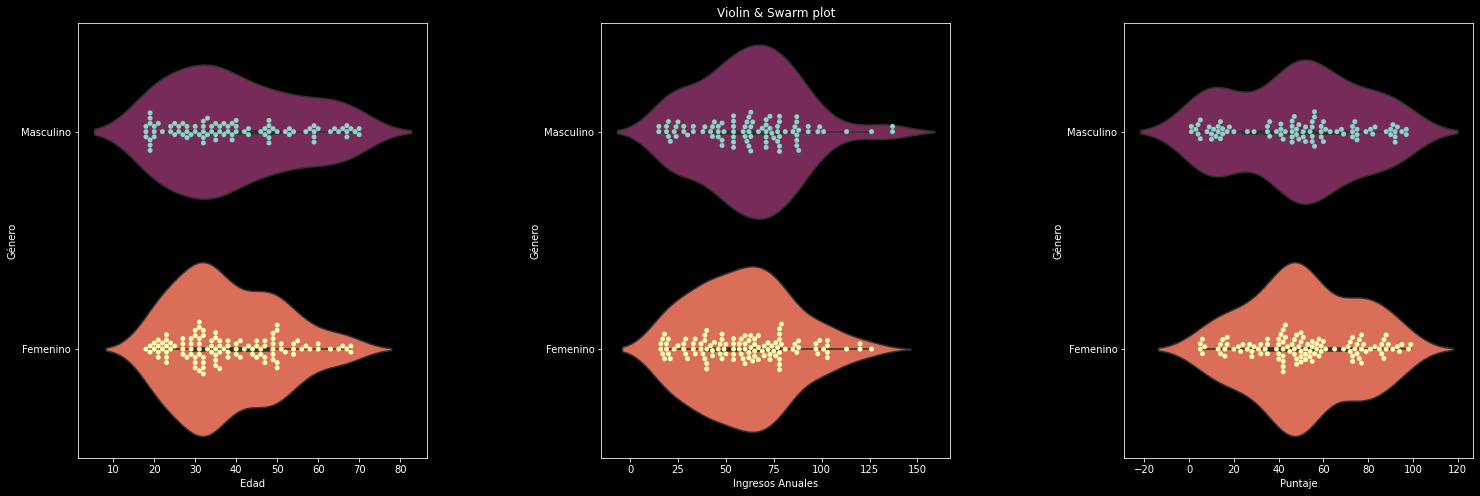

In [291]:
# Violin & Swarm plot
plt.figure(1 , figsize = (25 , 8))
n = 0 
for columnas in ['Edad' , 'Ingresos Anuales' , 'Puntaje']:
  n += 1 
  plt.subplot(1 , 3 , n)
  plt.subplots_adjust(hspace = 0.5, wspace = 0.5)
  sns.violinplot(x = columnas, y = 'Género', data = df, palette = 'rocket')
  sns.swarmplot(x = columnas, y = 'Género', data = df)
  plt.ylabel('Género')
  plt.title('Violin & Swarm plot' if n == 2 else None)
plt.show()

## Resolución con Python
Para resolver el problema de Clusterización vamos a utlizar la librería de Machine Learning [sckit-learn](https://scikit-learn.org/stable/), en particular la clase [__KMeans__](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html#examples-using-sklearn-cluster-kmeans).

### Parámetros
Principales parámetros requeridos por la clase *__KMeans__*:
>__n_clusters__: Cantidad de clusters y centroides a generar.

>__init__: Método de inicialización del algoritmo de resolución. Valores posibles: *k-means++*, *random*.

>__n_init__: Cantidad de veces que el algoritmo es ejecutado con distintos centroides iniciales.

>__max_iter__: Cantidad máxima de iteraciones del algoritmo.

>__tol__: Tolerancia utilizada para determinar la convergencia. Default *1e-4*.

>__algorithm__: Algoritmo utilizado para resolver el problema de optimización. Valores posibles: *lloyd*, *“elkan*, *auto*, *full*. Default *lloyd*.

>__verbose__: Imprime el resultado de cada iteración.

### Atributos
Principales atributos de la clase *__KMeans__*:
>__cluster_centers___: Coordenadas de los centroides.

>__labels___: Etiqueta del centroide al cual pertenece cada punto.

>__inertia___: Inercia o variability.

>__n_iter___: Cantidad de iteraciones.

### Métodos
La clase *__KMeans__* acepta los siguientes métodos:

>__fit(X[, y, sample_weight])__: Ejecuta el algoritmo de clusterización.

>__fit_predict(X[, y, sample_weight])__: Compute cluster centers and predict cluster index for each sample.

>__fit_transform(X[, y, sample_weight])__: Compute clustering and transform X to cluster-distance space.

>__get_feature_names_out([input_features])__: Get output feature names for transformation.

>__get_params([deep])__: Get parameters for this estimator.

>__predict(X[, sample_weight])__: Predict the closest cluster each sample in X belongs to.

>__score(X[, y, sample_weight])__: Opposite of the value of X on the K-means objective.

>__set_params(**params)__: Set the parameters of this estimator.

>__transform(X)__: Transform X to a cluster-distance space.

In [292]:
# Librerías para resolver el problema de Clusterización
import numpy as np
from sklearn.cluster import KMeans

K: 1. Inertia: 171535.50
K: 2. Inertia: 75949.16
K: 3. Inertia: 45840.68
K: 4. Inertia: 28165.58
K: 5. Inertia: 23811.52
K: 6. Inertia: 19492.61
K: 7. Inertia: 15523.68
K: 8. Inertia: 13030.52
K: 9. Inertia: 11590.79
K: 10. Inertia: 10206.40


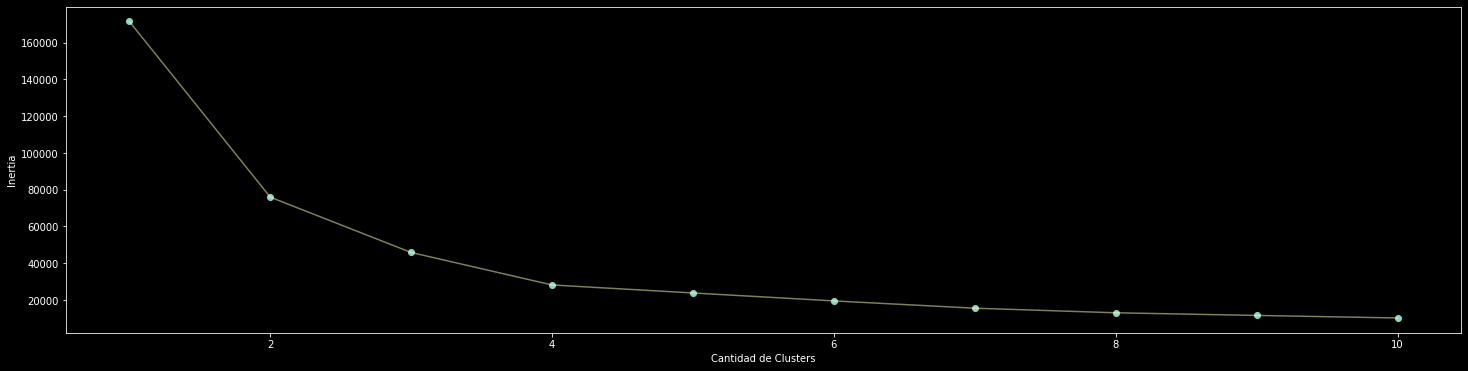

In [293]:
# Supongamos que queremos armar clusters de clientes a partir de las variables Edad y Puntaje
# Edad y Puntaje
X = np.array(list(zip(df['Edad'], df['Puntaje'])))
inertia = []
k_range = range(1,11)

for k in k_range:
  # Instanciamos la clase
  algorithm = KMeans(
    n_clusters = k,
    init='k-means++',
    n_init = 10,
    max_iter=300,
    tol=0.0001
  )
  # Ejecutamos el problema de clusterización
  algorithm.fit(X)
  inertia.append(algorithm.inertia_)
  print(f'K: {k}. Inertia: {algorithm.inertia_:.2f}')

plt.figure(1 , figsize = (25 ,6))
plt.plot(np.arange(1 , 11), inertia, 'o')
plt.plot(np.arange(1 , 11), inertia, '-', alpha = 0.5)
plt.xlabel('Cantidad de Clusters')
plt.ylabel('Inertia')
plt.show()

## Regla del Codo
El segundo problema de este método consiste en determinar la cantidad de clusters adecuada. $^3$ Una heurística generalmente utilizada para determinar *K* es el *[método del codo](https://en.wikipedia.org/wiki/Elbow_method_(clustering)) (elbow method)*, que consiste en graficar la *variability* en función de la cantidad de clústers.

El método del codo se basa en la hipótesis de que los datos se componen de un conjunto de grupos, por lo que al incrementar la cantidad de clusters, estos grupos comienzan a ser representados por estos clusters, disminuyendo así el valor de la función objetivo. Sin embargo, cuando la cantidad de clusters supere la cantidad de grupos en los datos, el impacto sobre la función objetivo sera menor y presentará una mejora lenta ante el aumento de K; ya que los clusters dejan de representar a los grupos, y solo los subdividen (pasamos de una situación de *under-fitting* a una de *over-fitting*)

Otras alternativas son realizar Clustering jerárquico en subconjuntos del conjunto de datos para determinar K, o utilizar los coeficientes de [Silhouette](https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html).$^4$

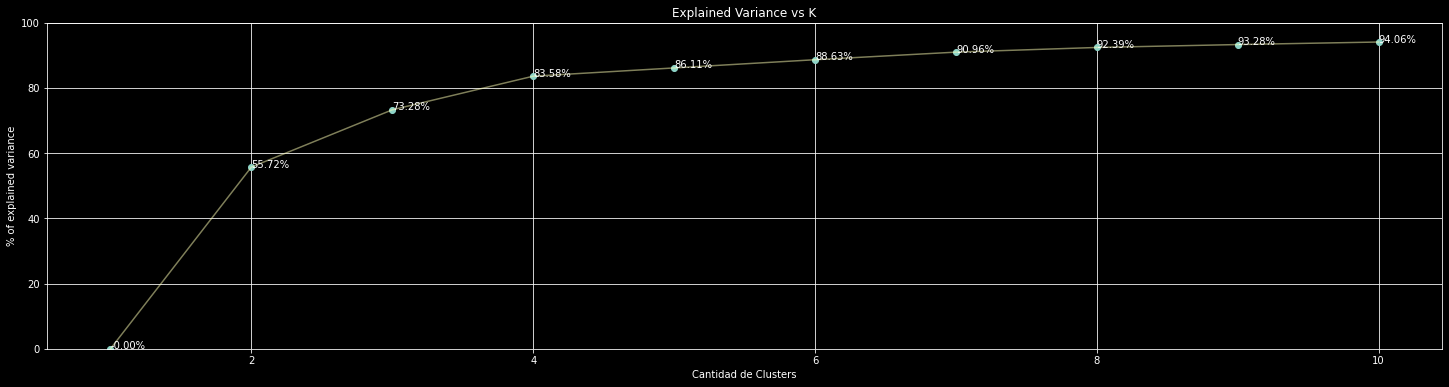

In [294]:
# Importamos dos funciones para el calculo de las distancias
from scipy.spatial.distance import cdist, pdist

clusters_results = [KMeans(n_clusters = k, init='k-means++', n_init = 10, max_iter=300, tol=0.0001).fit(X) for k in k_range]
centroids = [K.cluster_centers_ for K in clusters_results] # Coordenadas de los centroides
K_dist = [cdist(X, centroid, 'euclidean') for centroid in centroids] # Distancia entre los vectores y los centroides
dist = [np.min(k_centroid, axis=1) for k_centroid in K_dist] # Minima distancia entre cada vector y los centroides (distancia del punto más cercano a cada centroide)
of_value = [sum(d**2) for d in dist] # Valor de la Función Objetivo para cada clusterización propuesta
max_inertia = sum(pdist(X)**2)/X.shape[0] # Maxima Intertia (cuando k=1)
exp_variance = max_inertia - of_value
exp_variance_perct = exp_variance/max_inertia*100


fig = plt.figure(1 , figsize = (25 ,6))
ax = fig.add_subplot(111)
ax.set_ylim((0,100))
plt.grid(True)
plt.plot(k_range, exp_variance_perct, 'o')
plt.plot(k_range, exp_variance_perct, '-', alpha = 0.5)

for xy in zip(k_range, exp_variance_perct):
  ax.annotate('{:.2f}%'.format(xy[1]), xy=xy, textcoords='data')

plt.xlabel('Cantidad de Clusters')
plt.ylabel('% of explained variance')
plt.title('Explained Variance vs K')
plt.show()

## Diagramas de Voronoi

El algoritmo de resolución de este problema de clusterización y sus pasos suelen visualizarse a través del uso de los [diagramas de Voronoi](https://en.wikipedia.org/wiki/Voronoi_diagram), los cuales ayudan a entender su lógica.

A continuación graficaremos este diagrama para el anterior ejemplo.

In [295]:
# Instanciamos la clase y calculamos los clusters
algorithm = KMeans(
  n_clusters = 4, # Basandonos en el método del codo elegimos 4 clusters
  init='k-means++',
  n_init = 10,
  max_iter=300,
  tol=0.0001,
  verbose=True # Para ver las iteraciones del algoritmo
)
algorithm.fit(X)
etiquetas = algorithm.labels_
centroides = algorithm.cluster_centers_

Initialization complete
Iteration 0, inertia 44930.0
Iteration 1, inertia 39731.47229272248
Iteration 2, inertia 37629.731530345554
Iteration 3, inertia 35730.571390673365
Iteration 4, inertia 34193.97214800521
Iteration 5, inertia 32585.37389106962
Iteration 6, inertia 30271.594085587465
Iteration 7, inertia 28790.10272938711
Iteration 8, inertia 28239.034199691916
Iteration 9, inertia 28172.705092506112
Converged at iteration 9: strict convergence.
Initialization complete
Iteration 0, inertia 48992.0
Iteration 1, inertia 31207.94362813633
Iteration 2, inertia 28993.941871925832
Iteration 3, inertia 28361.978102054443
Iteration 4, inertia 28184.26863931124
Iteration 5, inertia 28172.705092506112
Converged at iteration 5: strict convergence.
Initialization complete
Iteration 0, inertia 58677.0
Iteration 1, inertia 41400.17313810971
Iteration 2, inertia 41233.06507974226
Iteration 3, inertia 41169.64246147849
Iteration 4, inertia 41147.78864082467
Iteration 5, inertia 41119.35463851824


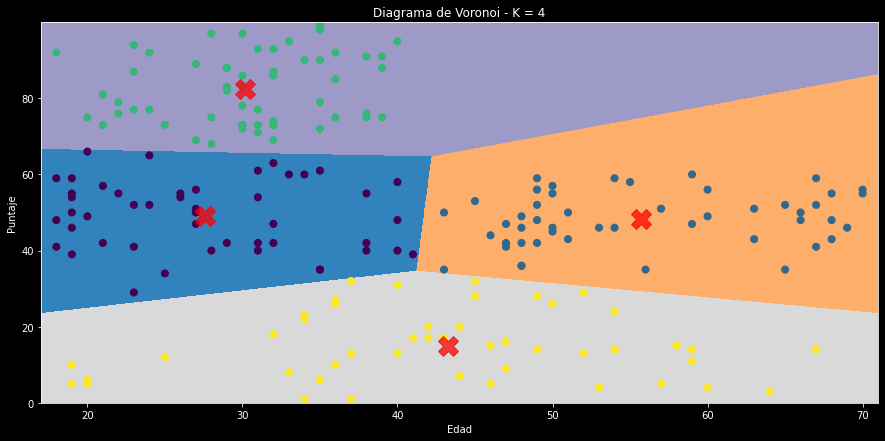

In [296]:
# Seteamos los ejes del gráfico
h = 0.02
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(
  np.arange(x_min, x_max, h),
  np.arange(y_min, y_max, h)
)
Z = algorithm.predict(np.c_[
  xx.ravel(),
  yy.ravel()
]) 
# Creamos el gráfico
plt.figure(1 , figsize = (15 , 7) )
plt.clf()
Z = Z.reshape(xx.shape)
# Graficamos las regiones o clusters
plt.imshow(
  Z,
  interpolation='nearest', 
  extent=(
    xx.min(),
    xx.max(),
    yy.min(),
    yy.max()
  ),
  cmap = plt.cm.tab20c,
  aspect = 'auto',
  origin='lower'
)
# Graficamos los puntos
plt.scatter(
  x = 'Edad',
  y = 'Puntaje',
  data = df,
  c = etiquetas, 
  s = 200,
  marker='.'
)
# Graficamos los centroides
plt.scatter(
  x = centroides[: , 0],
  y = centroides[: , 1],
  s = 400,
  marker = 'X',
  c = 'red',
  alpha = 0.75
)
plt.ylabel('Puntaje')
plt.xlabel('Edad')
plt.title('Diagrama de Voronoi - K = 4')
plt.show()

---

# Ejemplo 2
Ejemplo basado en el mismo conjunto de datos.

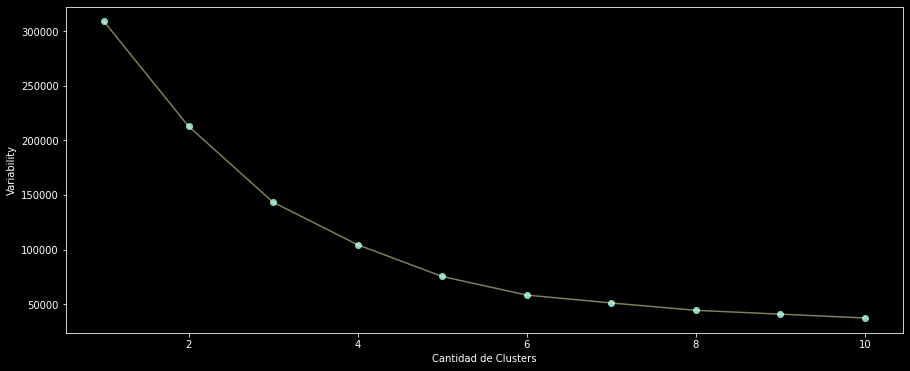

In [297]:
# Segmentation using Age, Annual Income and Spending Score
X = np.array(list(zip(df['Edad'], df['Ingresos Anuales'], df['Puntaje'])))
inertia = []
k_range = range(1 , 11)

for k in k_range:
  algorithm = KMeans(
    n_clusters = k,
    init='k-means++',
    n_init = 10,
    max_iter=300,
    tol=0.0001
  )
  algorithm.fit(X)
  inertia.append(algorithm.inertia_)

plt.figure(1 , figsize = (15 ,6))
plt.plot(np.arange(1 , 11) , inertia , 'o')
plt.plot(np.arange(1 , 11) , inertia , '-' , alpha = 0.5)
plt.xlabel('Cantidad de Clusters')
plt.ylabel('Variability')
plt.show()

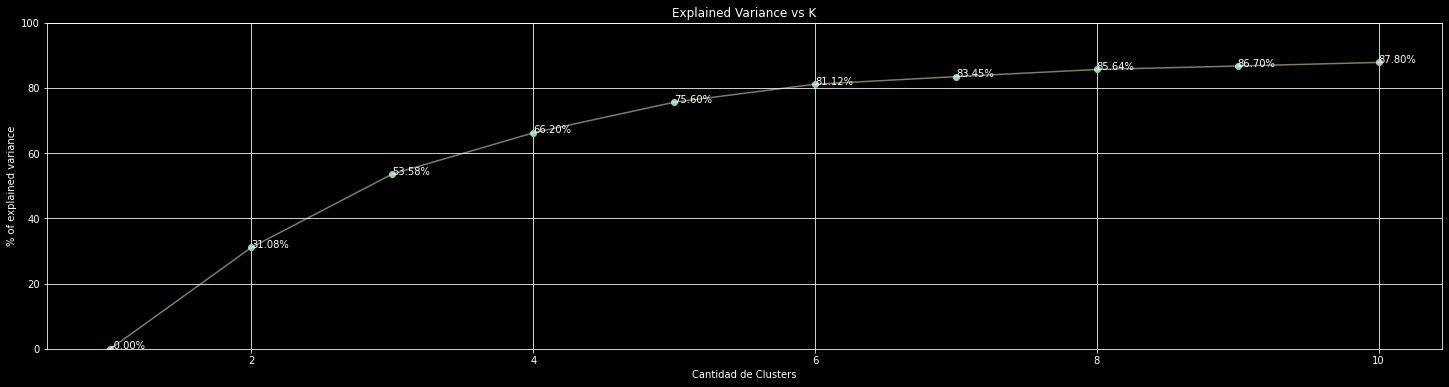

In [298]:
# Elbow Method
clusters_results = [KMeans(n_clusters = k, init='k-means++', n_init = 10, max_iter=300, tol=0.0001).fit(X) for k in k_range]
centroids = [K.cluster_centers_ for K in clusters_results] # Coordenadas de los centroides
K_dist = [cdist(X, centroid, 'euclidean') for centroid in centroids] # Distancia entre los vectores y los centroides
dist = [np.min(k_centroid, axis=1) for k_centroid in K_dist] # Minima distancia entre cada vector y los centroides (distancia del punto más cercano a cada centroide)
of_value = [sum(d**2) for d in dist] # Valor de la Función Objetivo para cada clusterización propuesta
max_inertia = sum(pdist(X)**2)/X.shape[0] # Maxima Intertia (cuando k=1)
exp_variance = max_inertia - of_value
exp_variance_perct = exp_variance/max_inertia*100


fig = plt.figure(1 , figsize = (25 ,6))
ax = fig.add_subplot(111)
ax.set_ylim((0,100))
plt.grid(True)
plt.plot(k_range, exp_variance_perct, 'o')
plt.plot(k_range, exp_variance_perct, '-', alpha = 0.5)

for xy in zip(k_range, exp_variance_perct):
  ax.annotate('{:.2f}%'.format(xy[1]), xy=xy, textcoords='data')

plt.xlabel('Cantidad de Clusters')
plt.ylabel('% of explained variance')
plt.title('Explained Variance vs K')
plt.show()

In [299]:
algorithm = KMeans(
  n_clusters = 6, # Basados en la regla del codo
  init='k-means++',
  n_init = 10,
  max_iter=300,
  tol=0.0001,
  verbose=True
)
algorithm.fit(X)
etiquedas = algorithm.labels_
centroides = algorithm.cluster_centers_

Initialization complete
Iteration 0, inertia 106853.0
Iteration 1, inertia 76465.9500940743
Iteration 2, inertia 69894.384330628
Iteration 3, inertia 63851.42036579859
Iteration 4, inertia 59009.17921498497
Iteration 5, inertia 58388.94451734812
Iteration 6, inertia 58362.76012106443
Iteration 7, inertia 58314.524775224774
Converged at iteration 7: strict convergence.
Initialization complete
Iteration 0, inertia 78171.0
Iteration 1, inertia 62037.43683370722
Iteration 2, inertia 59765.338088824574
Iteration 3, inertia 59046.18313892317
Iteration 4, inertia 58476.676414887486
Iteration 5, inertia 58300.44332159069
Converged at iteration 5: strict convergence.
Initialization complete
Iteration 0, inertia 80190.0
Iteration 1, inertia 58971.84779160339
Iteration 2, inertia 58424.336338494715
Iteration 3, inertia 58335.81018641069
Iteration 4, inertia 58302.40630860368
Converged at iteration 4: strict convergence.
Initialization complete
Iteration 0, inertia 101572.0
Iteration 1, inertia 81

In [300]:
# Creamos un gráfico con los clusters obtenidos
df['Etiqueta'] =  etiquetas
trace = go.Scatter3d(
  x = df['Edad'],
  y = df['Puntaje'],
  z = df['Ingresos Anuales'],
  mode = 'markers',
  marker = dict(
    color = df['Etiqueta'], 
    size = 10,
    line = dict(color= df['Etiqueta'], width= 12),
    opacity = 0.8
  )
)
data = [trace]
layout = go.Layout(
  title= 'Clusters considerando la Edad, Puntaje e Ingresos Anuales',
  scene = dict(
    xaxis = dict(title  = 'Edad'),
    yaxis = dict(title  = 'Puntaje'),
    zaxis = dict(title  = 'Ingresos Anuales')
  )
)

fig = go.Figure(data=data, layout=layout)
fig.update_layout(template='plotly_dark', width=1280, height=720)
fig.show(renderer="colab")

# Ejemplo 3

Ejemplo basado en el mismo conjunto de datos.

K: 1. Inertia: 269981.28
K: 2. Inertia: 181363.60
K: 3. Inertia: 106348.37
K: 4. Inertia: 73679.79
K: 5. Inertia: 44448.46
K: 6. Inertia: 37239.84
K: 7. Inertia: 30241.34
K: 8. Inertia: 25029.25
K: 9. Inertia: 21794.89
K: 10. Inertia: 19657.78


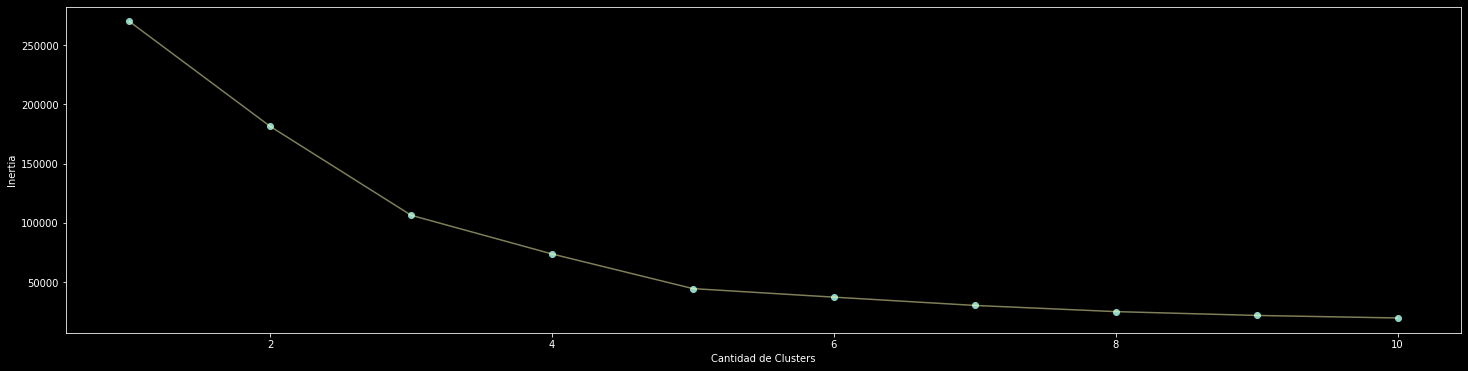

In [301]:
# Ingresos Anuales y Puntaje
X = np.array(list(zip(df['Ingresos Anuales'], df['Puntaje'])))
inertia = []
k_range = range(1,11)

for k in k_range:
  # Instanciamos la clase
  algorithm = KMeans(
    n_clusters = k,
    init='k-means++',
    n_init = 10,
    max_iter=300,
    tol=0.0001
  )
  # Ejecutamos el problema de clusterización
  algorithm.fit(X)
  inertia.append(algorithm.inertia_)
  print(f'K: {k}. Inertia: {algorithm.inertia_:.2f}')

plt.figure(1 , figsize = (25 ,6))
plt.plot(np.arange(1 , 11), inertia, 'o')
plt.plot(np.arange(1 , 11), inertia, '-', alpha = 0.5)
plt.xlabel('Cantidad de Clusters')
plt.ylabel('Inertia')
plt.show()

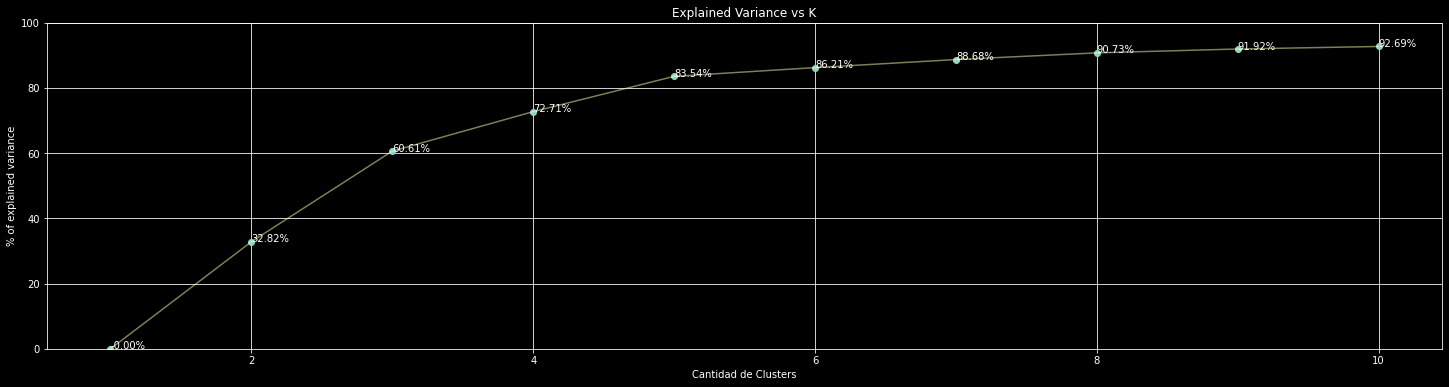

In [302]:
clusters_results = [KMeans(n_clusters = k, init='k-means++', n_init = 10, max_iter=300, tol=0.0001).fit(X) for k in k_range]
centroids = [K.cluster_centers_ for K in clusters_results] # Coordenadas de los centroides
K_dist = [cdist(X, centroid, 'euclidean') for centroid in centroids] # Distancia entre los vectores y los centroides
dist = [np.min(k_centroid, axis=1) for k_centroid in K_dist] # Minima distancia entre cada vector y los centroides (distancia del punto más cercano a cada centroide)
of_value = [sum(d**2) for d in dist] # Valor de la Función Objetivo para cada clusterización propuesta
max_inertia = sum(pdist(X)**2)/X.shape[0] # Maxima Intertia (cuando k=1)
exp_variance = max_inertia - of_value
exp_variance_perct = exp_variance/max_inertia*100

fig = plt.figure(1 , figsize = (25 ,6))
ax = fig.add_subplot(111)
ax.set_ylim((0,100))
plt.grid(True)
plt.plot(k_range, exp_variance_perct, 'o')
plt.plot(k_range, exp_variance_perct, '-', alpha = 0.5)

for xy in zip(k_range, exp_variance_perct):
  ax.annotate('{:.2f}%'.format(xy[1]), xy=xy, textcoords='data')

plt.xlabel('Cantidad de Clusters')
plt.ylabel('% of explained variance')
plt.title('Explained Variance vs K')
plt.show()

In [303]:
algorithm = KMeans(
  n_clusters = 4, # Basandonos en el método del codo elegimos 4 clusters
  init='k-means++',
  n_init = 10,
  max_iter=300,
  tol=0.0001,
  verbose=True # Para ver las iteraciones del algoritmo
)
algorithm.fit(X)
etiquetas = algorithm.labels_
centroides = algorithm.cluster_centers_

Initialization complete
Iteration 0, inertia 95604.0
Iteration 1, inertia 74344.82015718051
Iteration 2, inertia 73679.78903948836
Converged at iteration 2: strict convergence.
Initialization complete
Iteration 0, inertia 94545.0
Iteration 1, inertia 83291.76947660424
Iteration 2, inertia 82705.93118886703
Iteration 3, inertia 82584.32413123832
Iteration 4, inertia 82494.5404409189
Iteration 5, inertia 82472.19413919412
Converged at iteration 5: strict convergence.
Initialization complete
Iteration 0, inertia 126274.0
Iteration 1, inertia 75219.70205458457
Iteration 2, inertia 73775.79184865978
Iteration 3, inertia 73679.78903948836
Converged at iteration 3: strict convergence.
Initialization complete
Iteration 0, inertia 103822.0
Iteration 1, inertia 76476.62083512942
Iteration 2, inertia 73791.44352887323
Iteration 3, inertia 73679.78903948836
Converged at iteration 3: strict convergence.
Initialization complete
Iteration 0, inertia 87092.0
Iteration 1, inertia 74235.96267428847
Iter

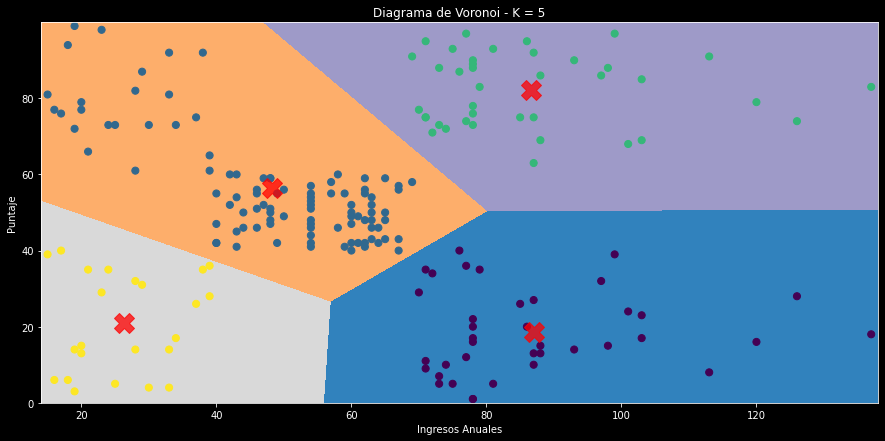

In [304]:
# Seteamos los ejes
h = 0.02

x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(
  np.arange(x_min, x_max, h),
  np.arange(y_min, y_max, h)
)
Z = algorithm.predict(np.c_[
  xx.ravel(),
  yy.ravel()
]) 
# Creamos el gráfico
plt.figure(1 , figsize = (15 , 7) )
plt.clf()
Z = Z.reshape(xx.shape)
# Graficamos las regiones o clusters
plt.imshow(
  Z,
  interpolation='nearest', 
  extent=(
    xx.min(),
    xx.max(),
    yy.min(),
    yy.max()
  ),
  cmap = plt.cm.tab20c,
  aspect = 'auto',
  origin='lower'
)
# Graficamos los puntos
plt.scatter(
  x = 'Ingresos Anuales',
  y = 'Puntaje',
  data = df,
  c = etiquetas, 
  s = 200,
  marker='.'
)
# Graficamos los centroides
plt.scatter(
  x = centroides[: , 0],
  y = centroides[: , 1],
  s = 400,
  marker = 'X',
  c = 'red',
  alpha = 0.75
)
plt.ylabel('Puntaje')
plt.xlabel('Ingresos Anuales')
plt.title('Diagrama de Voronoi - K = 5')
plt.show()

# Ejemplo 4

__Dataset utilizado:__ [Iris dataset](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_iris.html). $^5$ Código disponible en [K-means Clustering](https://scikit-learn.org/stable/auto_examples/cluster/plot_cluster_iris.html#sphx-glr-auto-examples-cluster-plot-cluster-iris-py).

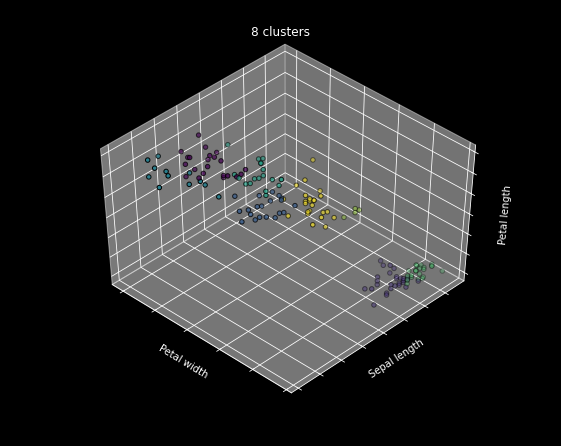

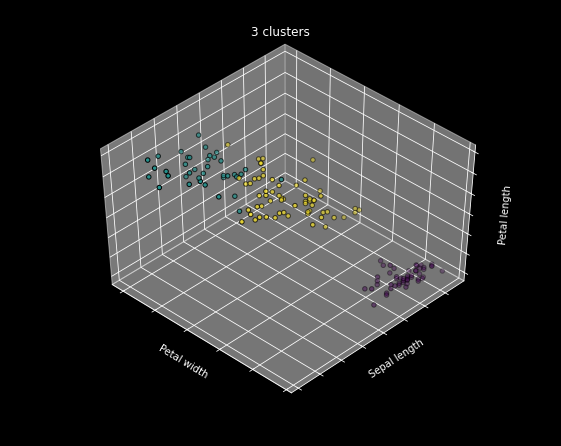

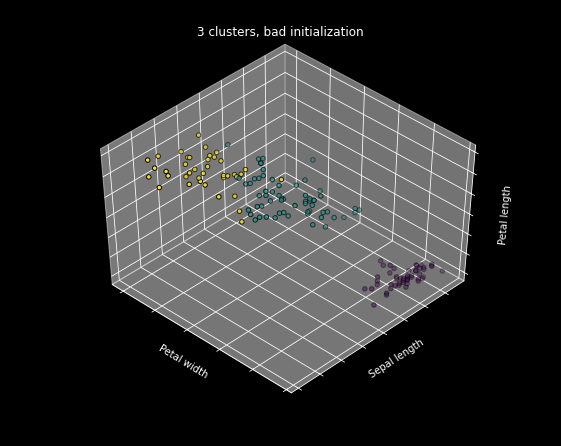

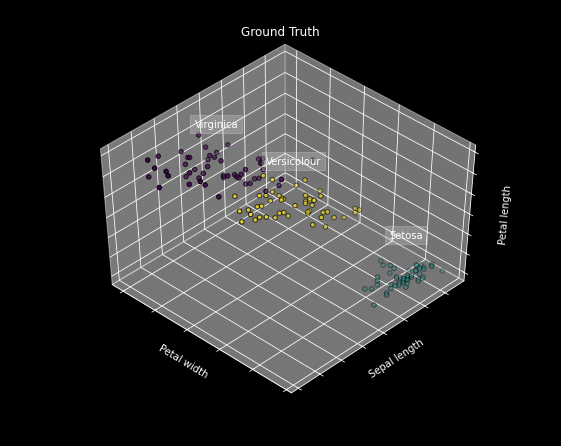

In [305]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn import datasets

np.random.seed(5)

iris = datasets.load_iris()
X = iris.data
y = iris.target

estimators = [
  ("k_means_iris_8", KMeans(n_clusters=8)),
  ("k_means_iris_3", KMeans(n_clusters=3)),
  ("k_means_iris_bad_init", KMeans(n_clusters=3, n_init=1, init="random")),
]

fignum = 1
titles = ["8 clusters", "3 clusters", "3 clusters, bad initialization"]

for name, est in estimators:
  fig = plt.figure(fignum, figsize=(8, 6))
  ax = fig.add_subplot(int(f"14{fignum}"), projection="3d", elev=48, azim=134)
  ax.set_position([0, 0, 0.95, 1])
  est.fit(X)
  labels = est.labels_

  ax.scatter(X[:, 3], X[:, 0], X[:, 2], c=labels.astype(float), edgecolor="k")

  ax.w_xaxis.set_ticklabels([])
  ax.w_yaxis.set_ticklabels([])
  ax.w_zaxis.set_ticklabels([])
  ax.set_xlabel("Petal width")
  ax.set_ylabel("Sepal length")
  ax.set_zlabel("Petal length")
  ax.set_title(titles[fignum - 1])
  ax.dist = 12
  fignum = fignum + 1

# Plot the ground truth
fig = plt.figure(fignum, figsize=(8, 6))
ax = fig.add_subplot(144, projection="3d", elev=48, azim=134)
ax.set_position([0, 0, 0.95, 1])

for name, label in [("Setosa", 0), ("Versicolour", 1), ("Virginica", 2)]:
  ax.text3D(
    X[y == label, 3].mean(),
    X[y == label, 0].mean(),
    X[y == label, 2].mean() + 2,
    name,
    horizontalalignment="center",
    bbox=dict(alpha=0.2, edgecolor="w", facecolor="w"),
  )
# Reorder the labels to have colors matching the cluster results
y = np.choose(y, [1, 2, 0]).astype(float)
ax.scatter(X[:, 3], X[:, 0], X[:, 2], c=y, edgecolor="k")

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
ax.set_xlabel("Petal width")
ax.set_ylabel("Sepal length")
ax.set_zlabel("Petal length")
ax.set_title("Ground Truth")
ax.dist = 12

fig.show()

# Ejemplo 5

Conjunto de datos disponible en [Housegold Electric Power Consuption - Kaggle](https://www.kaggle.com/datasets/uciml/electric-power-consumption-data-set).

También disponible para su descarga [aquí](https://github.com/ValentinSilvestri/sig-fceia-clustering/tree/main/utils).


In [306]:
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

from google.colab import files
uploaded = files.upload()

import io
df = pd.read_csv(io.BytesIO(uploaded['household_power_consumption.csv']), delimiter=';')

Saving household_power_consumption.csv to household_power_consumption (1).csv


In [307]:
data = df.iloc[0:, 3:10].dropna().values
data_train, data_test = train_test_split(data, train_size=.01) # Creación de un conjunto de entrenamiento y otro de prueba

In [308]:
X = PCA(n_components=2).fit_transform(data_train) # Analisis de Componentes Principales en el conjunto de prueba

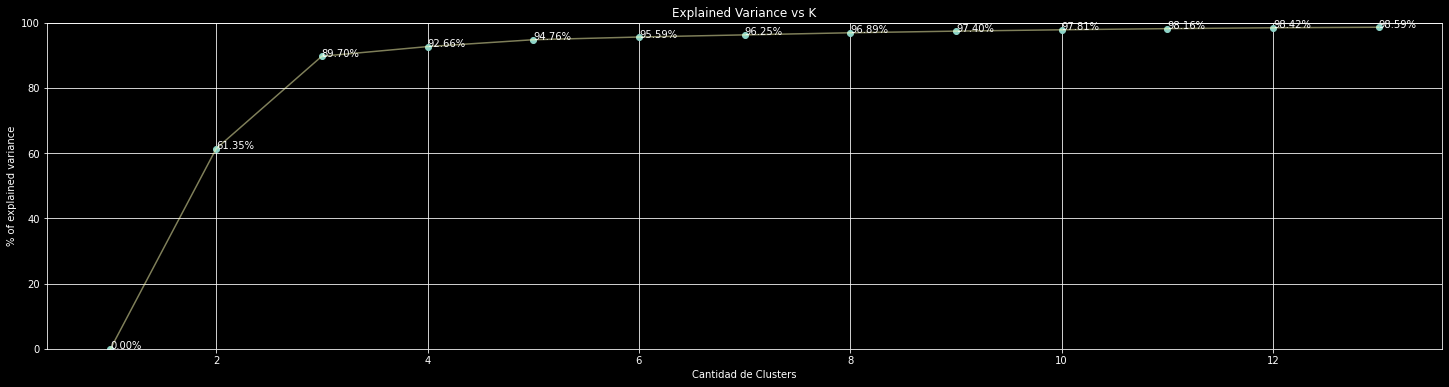

In [309]:
# Metodo del codo
k_range = range(1,14)

clusters_results = [KMeans(n_clusters = k, init='k-means++', n_init = 10, max_iter=300, tol=0.0001).fit(X) for k in k_range]
centroids = [K.cluster_centers_ for K in clusters_results]
K_dist = [cdist(X, centroid, 'euclidean') for centroid in centroids]
dist = [np.min(k_centroid, axis=1) for k_centroid in K_dist]
of_value = [sum(d**2) for d in dist]
max_inertia = sum(pdist(X)**2)/X.shape[0]
exp_variance = max_inertia - of_value
exp_variance_perct = exp_variance/max_inertia*100


fig = plt.figure(1 , figsize = (25 ,6))
ax = fig.add_subplot(111)
ax.set_ylim((0,100))
plt.grid(True)
plt.plot(k_range, exp_variance_perct, 'o')
plt.plot(k_range, exp_variance_perct, '-', alpha = 0.5)

for xy in zip(k_range, exp_variance_perct):
  ax.annotate('{:.2f}%'.format(xy[1]), xy=xy, textcoords='data')

plt.xlabel('Cantidad de Clusters')
plt.ylabel('% of explained variance')
plt.title('Explained Variance vs K')
plt.show()

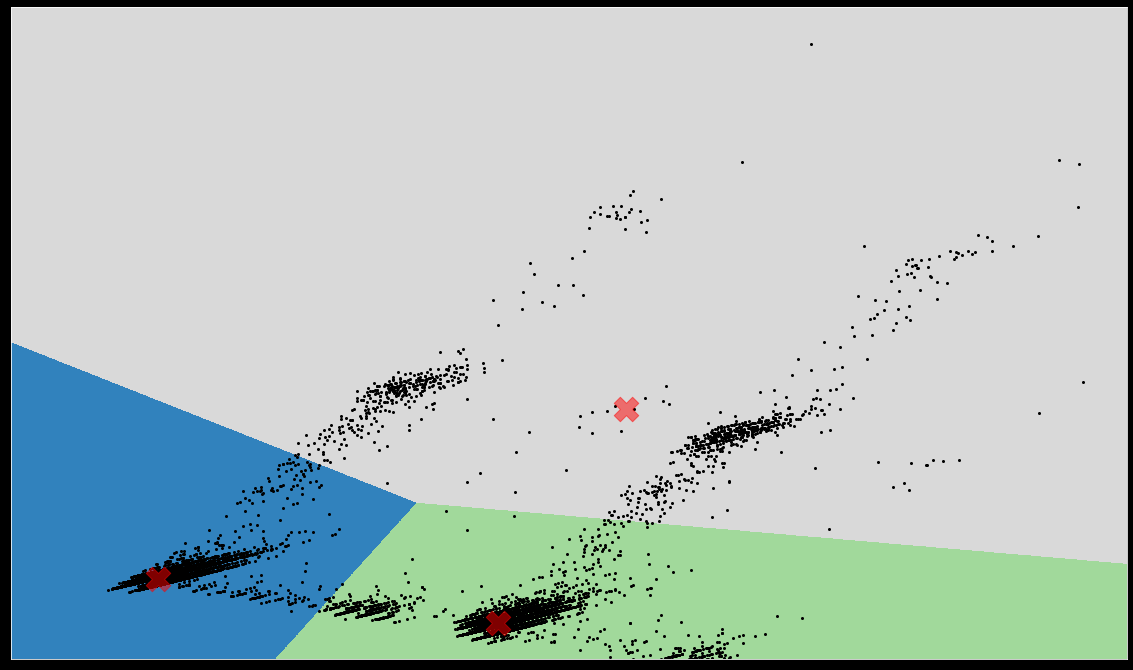

In [310]:
# Basandonos en el metodo del codo deberiamos generar 3 clusters
algorithm = KMeans(n_clusters = 3, init='k-means++', n_init = 10, max_iter=300, tol=0.0001)
algorithm.fit(X)

# Creacion de los rangos para el Diagrama de Voronoi
x_min, x_max = X[:, 0].min() - 5, X[:, 0].max() - 1
y_min, y_max = X[:, 1].min() + 1, X[:, 1].max() + 5
xx, yy = np.meshgrid(np.arange(x_min, x_max, .02), np.arange(y_min, y_max, .02))
Z = algorithm.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(1 , figsize = (20 , 12) )
plt.clf()

# Graficamos las regiones o clusters
plt.imshow(
  Z,
  interpolation = 'nearest',
  extent = (xx.min(), xx.max(), yy.min(), yy.max()),
  cmap = plt.cm.tab20c,
  aspect = 'auto',
  origin = 'lower'
)

# Graficamos los puntos
plt.plot(X[:, 0], X[:, 1], 'k.', markersize=4)

# Plot the centroids as a white X
centroids = algorithm.cluster_centers_
inert = algorithm.inertia_
plt.scatter(
  centroids[:, 0],
  centroids[:, 1],
  marker = 'X',
  s = 600,
  linewidths = 1,
  color = 'red',
  zorder = 8,
  alpha = 0.5
)

plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()

K: 2. Silhouette value: 0.7824
K: 3. Silhouette value: 0.8555
K: 4. Silhouette value: 0.8607
K: 5. Silhouette value: 0.8657
K: 6. Silhouette value: 0.7825
K: 7. Silhouette value: 0.7736
K: 8. Silhouette value: 0.6615
K: 9. Silhouette value: 0.6673
K: 10. Silhouette value: 0.6198
K: 11. Silhouette value: 0.5989
K: 12. Silhouette value: 0.5988
K: 13. Silhouette value: 0.4951


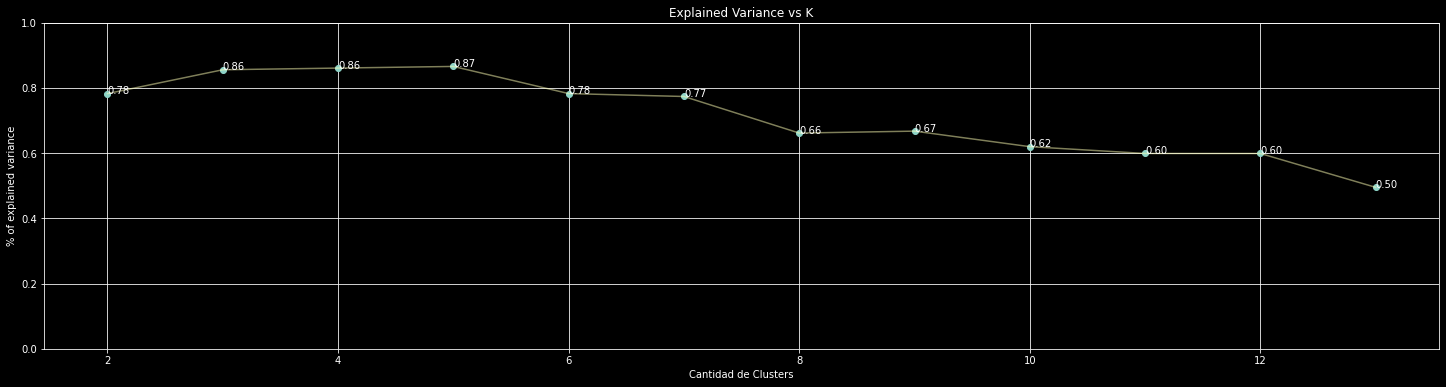

In [311]:
# Silhouette Analysis
# Valores de Silhouette cercanos a 1 representan mejores ajustes a los datos.

Ks = []
silhouette = []

for K in clusters_results[1:]:
  Ks.append(len(K.cluster_centers_))
  silhouette.append(silhouette_score(X, K.labels_, metric="euclidean"))
  print('K: {:d}. Silhouette value: {:.4f}'.format(len(K.cluster_centers_), silhouette_score(X, K.labels_, metric="euclidean")))

fig = plt.figure(1 , figsize = (25 ,6))
ax = fig.add_subplot(111)
ax.set_ylim((0,1))
plt.grid(True)
plt.plot(Ks, silhouette, 'o')
plt.plot(Ks, silhouette, '-', alpha = 0.5)

for xy in zip(Ks, silhouette):
  ax.annotate('{:.2f}'.format(xy[1]), xy=xy, textcoords='data')

plt.xlabel('Cantidad de Clusters')
plt.ylabel('% of explained variance')
plt.title('Explained Variance vs K')
plt.show()

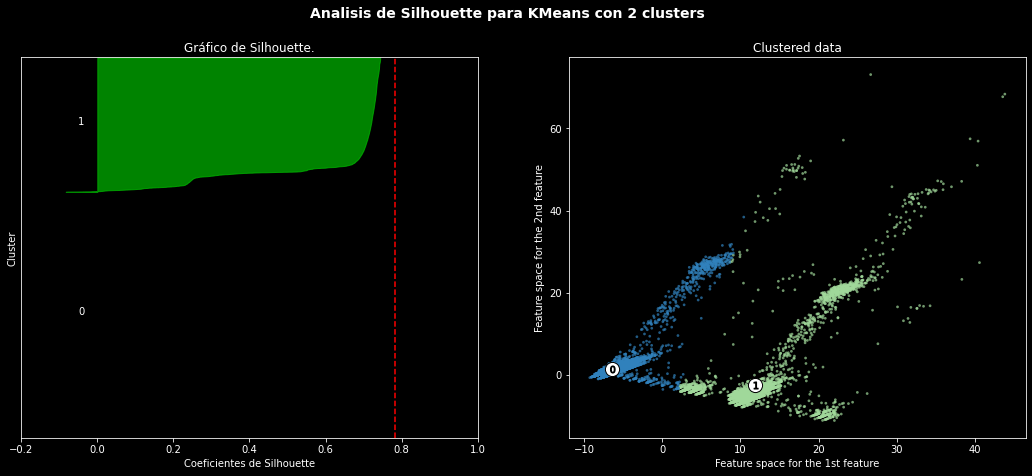

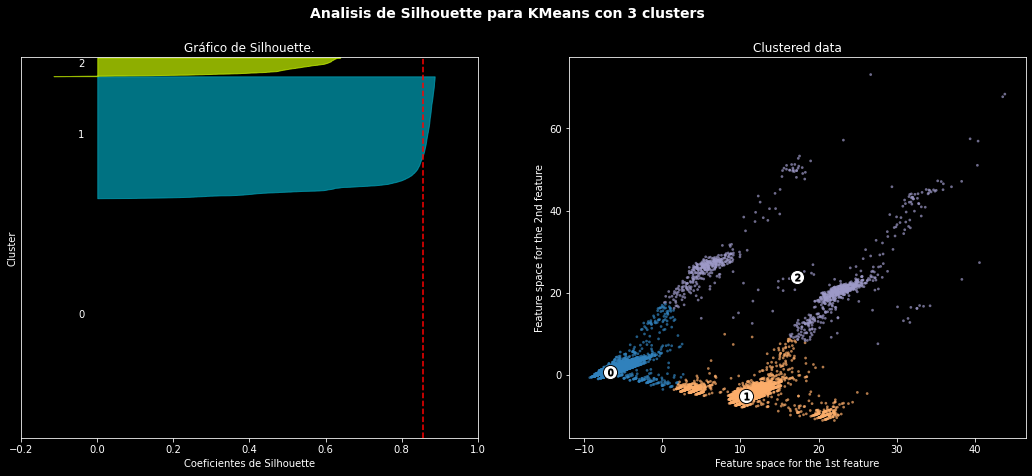

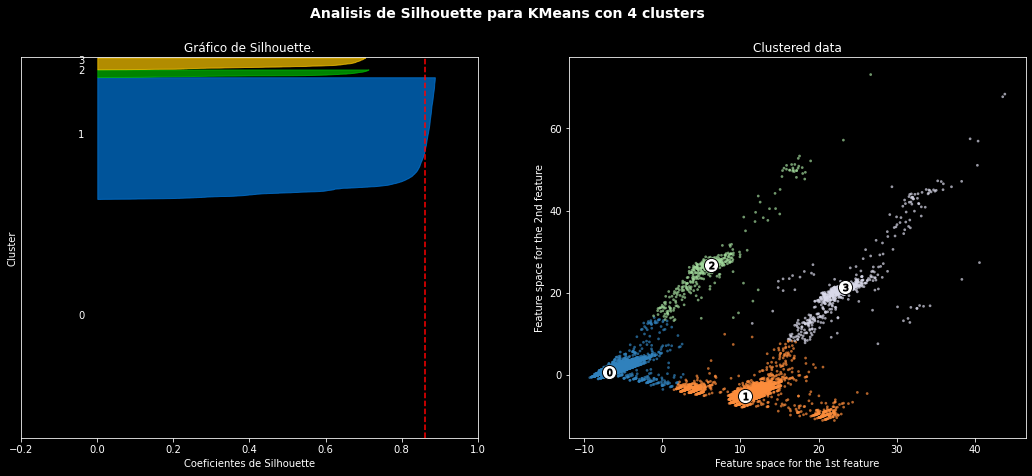

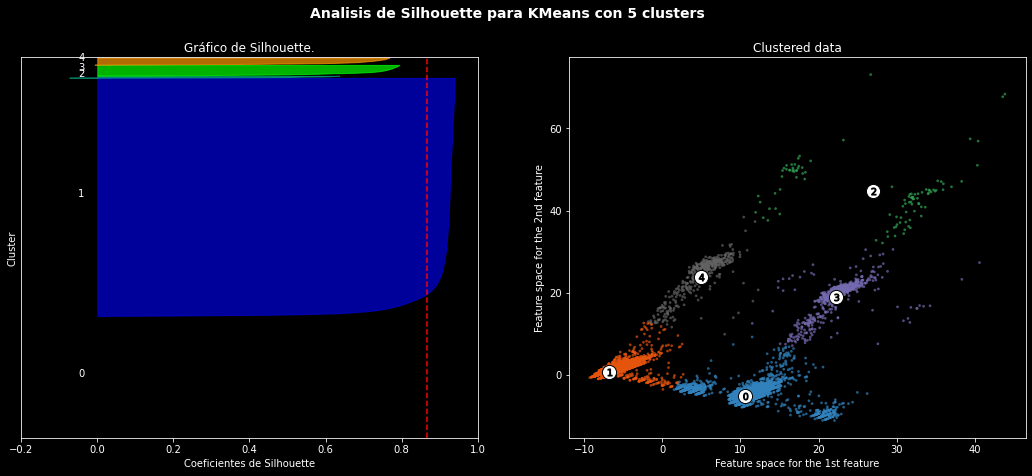

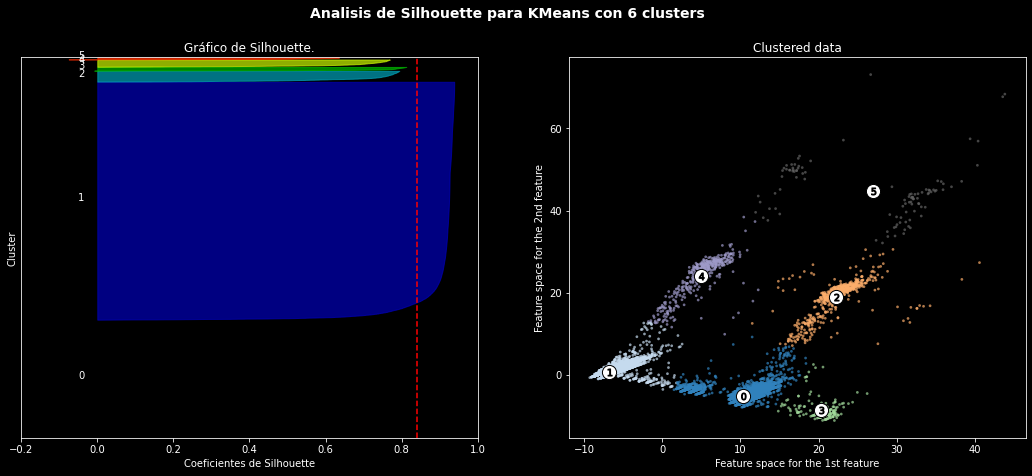

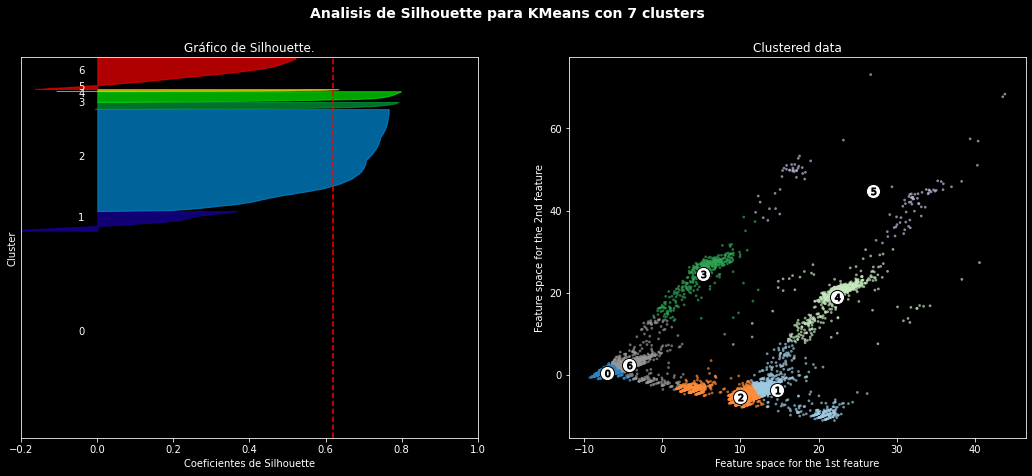

In [312]:
# Silhouette Plots
from sklearn.metrics import silhouette_samples

'''
Silhouette analysis can be used to study the separation distance between the 
resulting clusters. The silhouette plot displays a measure of how close each 
point in one cluster is to points in the neighboring clusters and thus provides 
a way to assess parameters like number of clusters visually. This measure has a 
range of [-1, 1].
'''

k_range = range(2,8)
for K in k_range:
  # Inicializamos los graficos
  fig, (ax1, ax2) = plt.subplots(1, 2)
  fig.set_size_inches(18, 7)
  ax1.set_xlim([-0.2, 1])
  ax1.set_ylim([0, len(X) + (K + 1) * 10])

  algorithm = KMeans(n_clusters=K, random_state=10)
  cluster_labels = algorithm.fit_predict(X)

  silhouette_avg = silhouette_score(X, cluster_labels)
  sample_silhouette_values = silhouette_samples(X, cluster_labels)

  y_lower = 10
  for i in range(K):
    ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
    ith_cluster_silhouette_values.sort()
    size_cluster_i = ith_cluster_silhouette_values.shape[0]

    y_upper = y_lower + size_cluster_i
    color = plt.cm.nipy_spectral(float(i) / K)
    ax1.fill_betweenx(
        np.arange(y_lower, y_upper),
        0,
        ith_cluster_silhouette_values,
        facecolor=color,
        edgecolor=color,
        alpha=0.7,
    )
    ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
    y_lower = y_upper + 10

  ax1.set_title("Gráfico de Silhouette.")
  ax1.set_xlabel("Coeficientes de Silhouette")
  ax1.set_ylabel("Cluster")

  ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

  ax1.set_yticks([])
  ax1.set_xticks([-0.2, 0, 0.2, 0.4, 0.6, 0.8, 1])

  colors = plt.cm.tab20c(cluster_labels.astype(float) / K)
  ax2.scatter(
      X[:, 0], X[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
  )

  centers = algorithm.cluster_centers_
  ax2.scatter(
    centers[:, 0],
    centers[:, 1],
    marker="o",
    c="white",
    alpha=1,
    s=200,
    edgecolor="k",
  )

  for i, c in enumerate(centers):
    ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

  ax2.set_title("Clustered data")
  ax2.set_xlabel("Feature space for the 1st feature")
  ax2.set_ylabel("Feature space for the 2nd feature")

  plt.suptitle(
    f"Analisis de Silhouette para KMeans con {K} clusters",
    fontsize=14,
    fontweight="bold",
  )

plt.show()

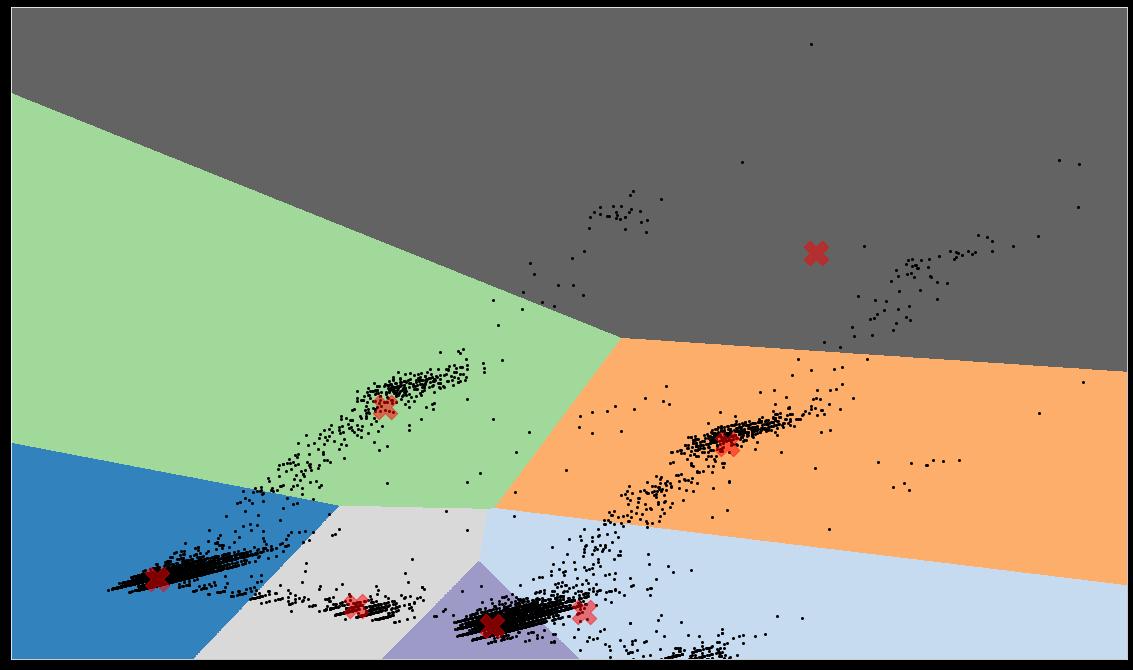

In [313]:
# Basandonos en el metodo de Silhouette debemos generar 7 clusters
algorithm = KMeans(n_clusters = 7, init='k-means++', n_init = 10, max_iter=300, tol=0.0001)
algorithm.fit(X)

# Creacion de los rangos para el Diagrama de Voronoi
x_min, x_max = X[:, 0].min() - 5, X[:, 0].max() - 1
y_min, y_max = X[:, 1].min() + 1, X[:, 1].max() + 5
xx, yy = np.meshgrid(np.arange(x_min, x_max, .02), np.arange(y_min, y_max, .02))
Z = algorithm.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(1 , figsize = (20 , 12) )
plt.clf()

# Graficamos las regiones o clusters
plt.imshow(
  Z,
  interpolation = 'nearest',
  extent = (xx.min(), xx.max(), yy.min(), yy.max()),
  cmap = plt.cm.tab20c,
  aspect = 'auto',
  origin = 'lower'
)

# Graficamos los puntos
plt.plot(X[:, 0], X[:, 1], 'k.', markersize=4)

# Plot the centroids as a white X
centroids = algorithm.cluster_centers_
inert = algorithm.inertia_
plt.scatter(
  centroids[:, 0],
  centroids[:, 1],
  marker = 'X',
  s = 600,
  linewidths = 1,
  color = 'red',
  zorder = 8,
  alpha = 0.5
)

plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()

---

# Material Adicional:

*    [Algorithms in Data Mining: k-means clustering - Yale University](http://www.cs.yale.edu/homes/el327/datamining2013aFiles/10_k_means_clustering.pdf)
*    [The Lloyd Algorithm for k-Means Clustering - University of California San Diego](https://www.youtube.com/watch?v=9rp1pzYn3hY)
*   Introduction to Computation and Programming Using Python With Application to Computational Modeling and Understanding Data. 3rd Edition - John V. Guttag.
*   [MIT - Introduction to Computational Thinking and Data Science: Clustering](https://www.youtube.com/watch?v=esmzYhuFnds)
*   [Web-Scale K-Means Clustering](https://www.eecs.tufts.edu/~dsculley/papers/fastkmeans.pdf)
*   [Scikit-learn: KMeans class](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html#sklearn.cluster.KMeans)
*   [Scikit-learn: Empirical evaluation of the impact of k-means initialization](https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_stability_low_dim_dense.html#sphx-glr-auto-examples-cluster-plot-kmeans-stability-low-dim-dense-py)
*   [Scikit-learn example: Clustering text documents using k-means](https://scikit-learn.org/stable/auto_examples/text/plot_document_clustering.html#sphx-glr-auto-examples-text-plot-document-clustering-py)
*   [Scikit-learn example: A demo of K-Means clustering on the handwritten digits data](https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_digits.html#sphx-glr-auto-examples-cluster-plot-kmeans-digits-py)

---
#### Footnotes

$^1$ [The effectiveness of lloyd-type methods for the k-means problem.](https://dl.acm.org/doi/abs/10.1145/2395116.2395117)

$^2$ [k-means++: The Advantages of Careful Seeding.](http://ilpubs.stanford.edu:8090/778/1/2006-13.pdf)

$^3$ [Determining the number of clusters in a data set](https://en.wikipedia.org/wiki/Determining_the_number_of_clusters_in_a_data_set).

$^4$ [Silhouettes: A graphical aid to the interpretation and validation of cluster analysis](https://www.sciencedirect.com/science/article/pii/0377042787901257).

$^5$ [Conjunto de datos flor iris](https://es.wikipedia.org/wiki/Conjunto_de_datos_flor_iris).